In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    discharged = df.recovered+df.deaths
    hospitalized = df.confirmed - discharged
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(discharged,dashes=[2,2,6, 2],c='y',label='discharged')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('discharged: ',discharged.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/discharged.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('discharged')
    plt.ylabel('deaths')
    plt.show()


In [3]:
# for c in json.columns:
#     print(c)

      date  confirmed  deaths  recovered
 2020-4-21       2811      48       2108
new  confirmed
      19.0


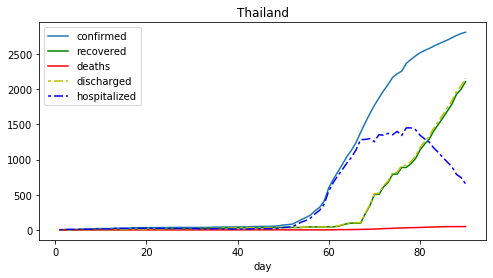

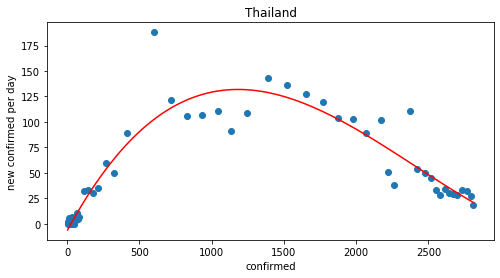

discharged:  2156
deaths:  48
%:  2.2263450834879404


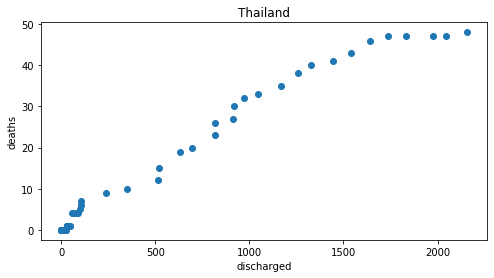

      date  confirmed  deaths  recovered
 2020-4-21       5482      92       3349
new  confirmed
      57.0


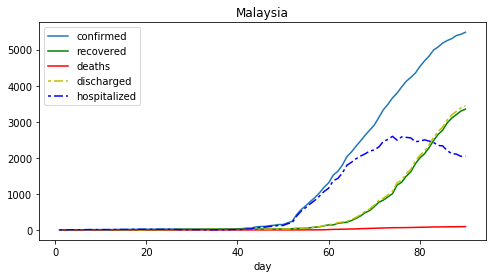

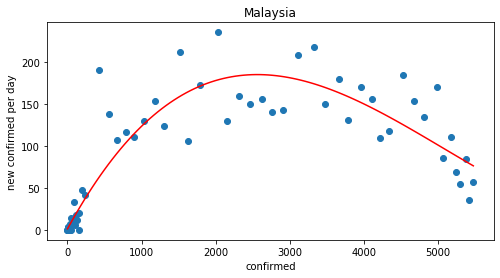

discharged:  3441
deaths:  92
%:  2.6736413833188024


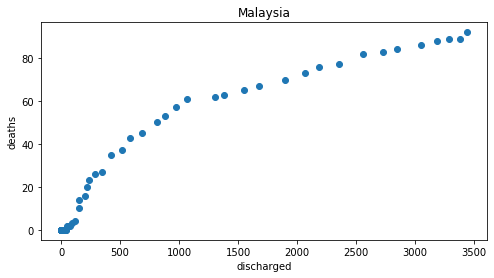

      date  confirmed  deaths  recovered
 2020-4-21       9125      11        839
new  confirmed
    1111.0


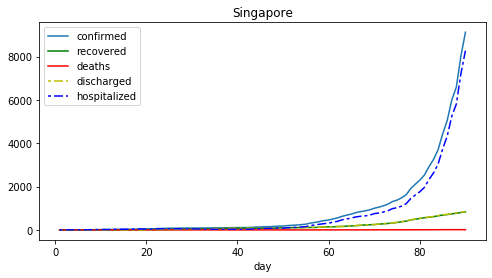

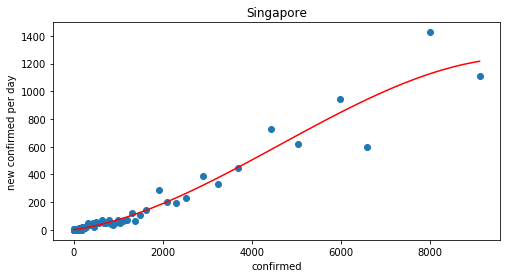

discharged:  850
deaths:  11
%:  1.2941176470588236


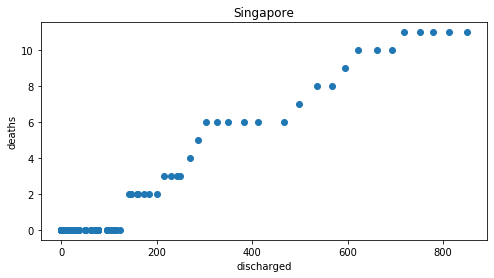

      date  confirmed  deaths  recovered
 2020-4-21       7135     616        842
new  confirmed
     375.0


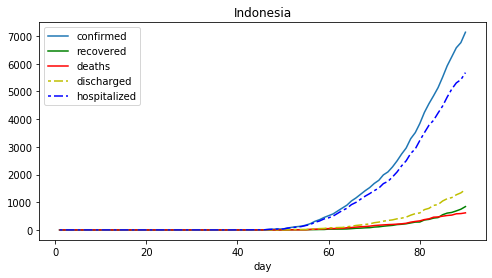

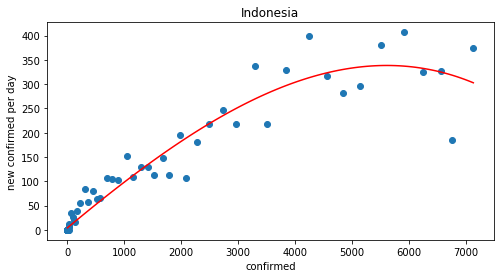

discharged:  1458
deaths:  616
%:  42.249657064471876


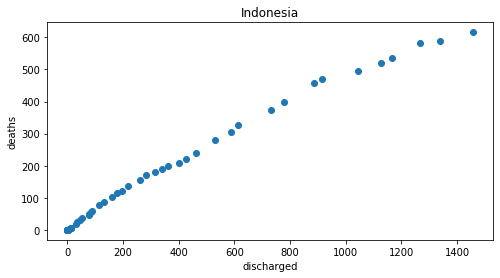

      date  confirmed  deaths  recovered
 2020-4-21     823786   44845      75204
new  confirmed
   39460.0


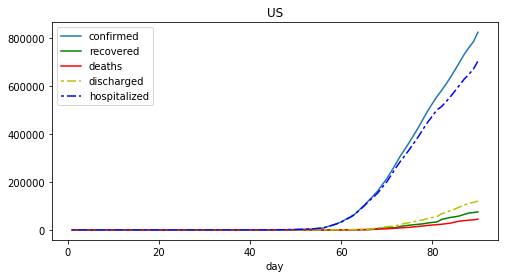

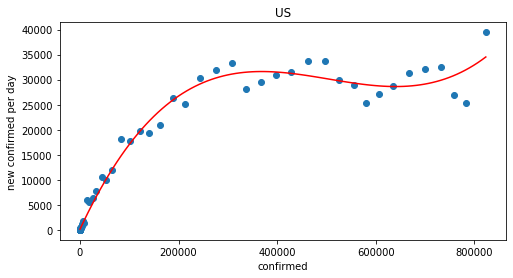

discharged:  120049
deaths:  44845
%:  37.35557980491299


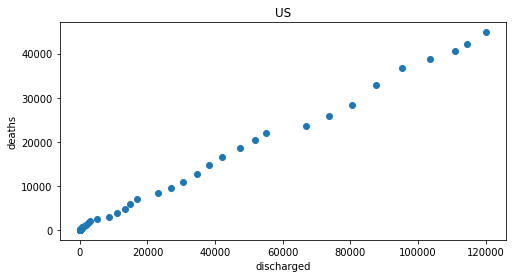

      date  confirmed  deaths  recovered
 2020-4-21      83853    4636      77799
new  confirmed
      36.0


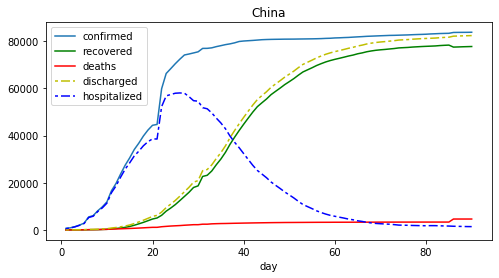

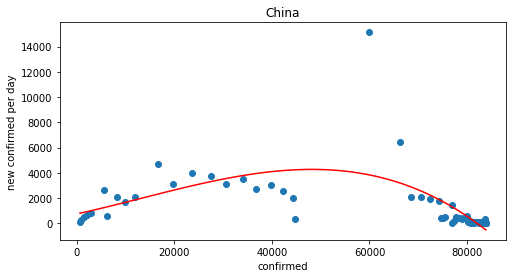

discharged:  82435
deaths:  4636
%:  5.623824831685571


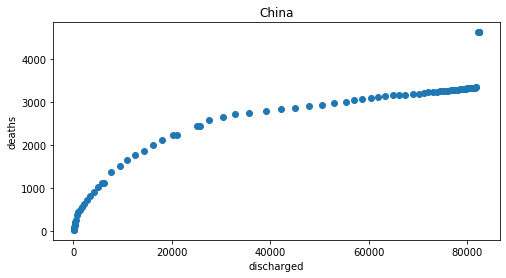

      date  confirmed  deaths  recovered
 2020-4-21      10683     237       8213
new  confirmed
       9.0


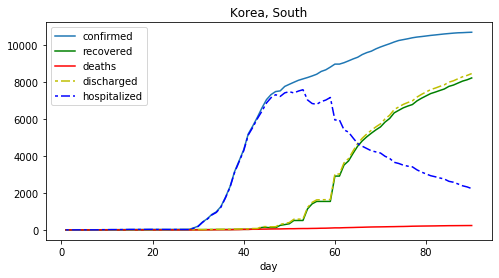

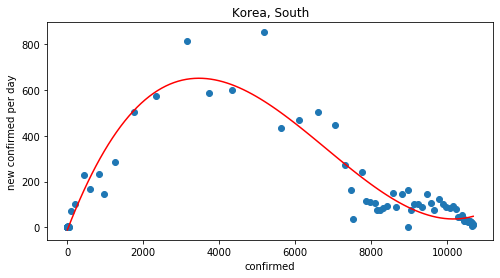

discharged:  8450
deaths:  237
%:  2.804733727810651


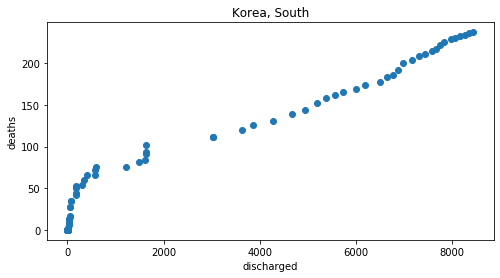

      date  confirmed  deaths  recovered
 2020-4-21     183957   24648      51600
new  confirmed
    2729.0


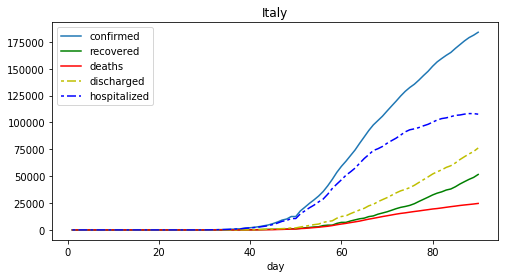

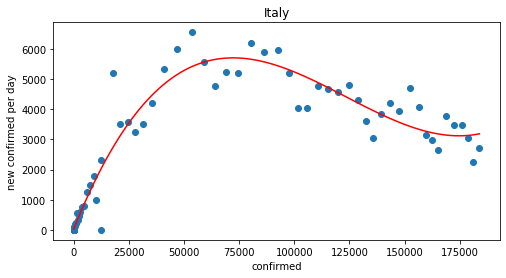

discharged:  76248
deaths:  24648
%:  32.32609379918161


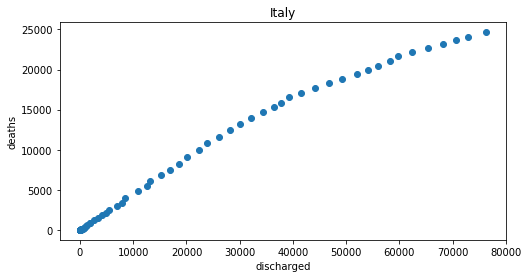

      date  confirmed  deaths  recovered
 2020-4-21     204178   21282      82514
new  confirmed
    3968.0


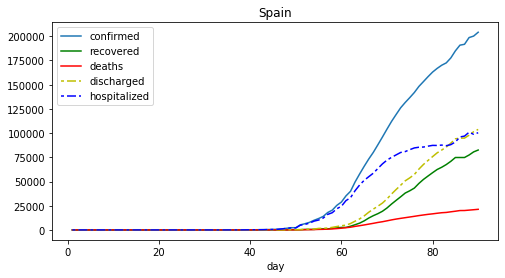

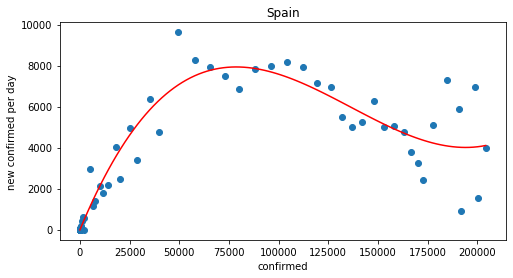

discharged:  103796
deaths:  21282
%:  20.50368029596516


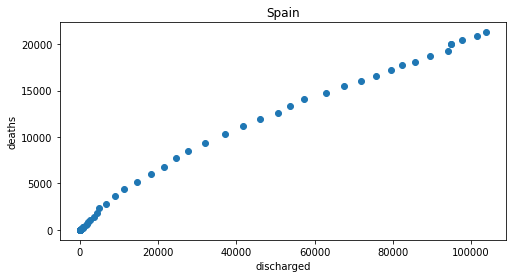

In [4]:
for c in ['Thailand','Malaysia','Singapore','Indonesia','US','China','Korea, South','Italy','Spain']:
    plot_country(c)
